# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you find **at least two datasets** on the web which are related, and that you visualize these datasets to answer the assignment question. You are free to utilize datasets with any location or domain, the usage of **Ann Arbor sports and athletics** datasets in the example is just a suggestion.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * You must state a question you are seeking to answer with your visualizations.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together as an example! [Example Solution File](./readonly/Assignment4_example.pdf)

In [4]:
#Here I am making a long story short, since there is a lot of steps where I need to verify the datasets. But the final result is a plot, which is the main point of this course.

In [8]:
from matplotlib import pyplot

In [1]:
%matplotlib widget

# We can bring in some other libraries we will need too, including the 
# matplotlib animation module
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import pandas as pd

In [2]:
data_oil = pd.read_excel('assets/oil.xls', sheet_name = 'Data 1')
data_cancer = pd.read_excel('assets/cancer.xlsx')
data_population = pd.read_csv('assets/population.csv',header = 9, sep=',')

In [3]:
#we only want to work with the Crude Oil and Petroleum Products:
data_oil_1 = data_oil[['Back to Contents','Data 1: U.S. Exports of Crude Oil and Petroleum Products']]
df_1 = pd.DataFrame(data_oil_1[734::])
df_1 = df_1.rename(columns={'Back to Contents':'Dates','Data 1: U.S. Exports of Crude Oil and Petroleum Products':'Exports_total'})
#This  'Exports_total' columns is given in Thousands of Barrels and we will remember that at the end.
#Now, we will transform this dataset by month in a dataset by year
df_1['Dates'] = pd.to_datetime(df_1['Dates'])
df_1['Year'] = df_1['Dates'].dt.year
df_yearly_sum = df_1.groupby(['Year'])['Exports_total'].sum().reset_index()
df_y_1 = df_yearly_sum

In [4]:
#preparing the second dataset:
data_cancer_1 = data_cancer[['Year',"Total"]]
#data_cancer_1.head()
df_cancer_yearly = data_cancer_1.groupby(['Year'])['Total'].sum().reset_index()
df_y_2 = df_cancer_yearly.rename(columns={'Total':'Cases_total'})
#It gives the total by year: 
#df_y_2.head()

In [5]:
df_3 = data_population[['date',' Population']]
df_3['date'] = pd.to_datetime(df_3['date'])
#df_3.loc[:,'date'] = pd.to_datetime(df_3['date'])
df_3['Population_M'] = round(df_3[' Population']/1000000, 2)
df_3.head()
df_3['Year'] = df_3['date'].dt.year
df_3.head()

C:\Users\ediso\AppData\Local\Temp\ipykernel_21844\2388946245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['date'] = pd.to_datetime(df_3['date'])


,date,Population,Population_M,Year
0,1950-12-31,148281550,148.28,1950
1,1951-12-31,150598453,150.60,1951
2,1952-12-31,152941727,152.94,1952
3,1953-12-31,155451199,155.45,1953
4,1954-12-31,158205873,158.21,1954


In [6]:
#Now we can put all date together to see where is the itersection among the dataframes to construct a relevante data:
#First, let us put together the oil data with the cancer data based on the Year these datasets have in common:

df = pd.merge(df_y_1,df_y_2, on ='Year')
df = pd.merge(df, df_3[['Year','Population_M']], on = 'Year')
df['Cumulative_export'] = df['Exports_total'].cumsum(axis = 0)
df['log_cum_exp'] = [np.log(float(x)) for x in df['Cumulative_export']]
df['Cases_normalized'] = df['Cases_total']/df['Population_M']
df['Export_normalized'] = df['Exports_total']/df['Population_M']
df['Cumulative_export'] = [np.float64(x) for x in df['Cumulative_export']]
#df.head()

Inserting the raw date inside:

In [15]:
#THIRD WE INSERT BOTH GRAPHS TO SHOW THE CORRELATION EXPLICITLY
from matplotlib.ticker import ScalarFormatter
from ipywidgets import interact
import ipywidgets as widgets

aa=df['Cumulative_export'].min()
ab=df['Cumulative_export'].max()
ba=df['Cases_total'].min()
bb=df['Cases_total'].max()
minn = df['Year'].min()
maxx = df['Year'].max()

@interact(bounds = widgets.IntRangeSlider(
    value = [1990,2000],
    min = minn,
    max = maxx,
    step=1,
    description= 'Years Range:',
    continuous_update = False,
    layout=widgets.Layout(width='70%'),
    readout_format='d',))

def figure_corr(bounds):  
    xin = int(bounds[0])
    xfin = int(bounds[1])    
    df_filtered = df.loc[(df['Year']>=xin) & (df['Year']<=xfin)]

    df_cum = df_filtered['Cumulative_export']
    df_cas = df_filtered['Cases_total']
    df_yea = df_filtered['Year']
    
    #the cross correlation is given by:
    corr = np.corrcoef(df_cum,df_cas)
    cor = round(corr[[1]][0][0],3)
    
    plt.rcParams["figure.figsize"] = [12,8.0]
    plt.rcParams["figure.autolayout"] = True
    
    fig, ax1 = plt.subplots()
    
    #ax1.figure(figsize=(12,8))
    ax1.plot(df_cum/1000000,df_cas/1000,'o-',markersize = 4, color = 'c', alpha = 1.0, lw=3)
    #ax1.set_xlabel('Cumulative exports of crude oil plus petroleum derivates (x$10^9$barrels)'.format(1000000000), fontsize = 14)
    ax1.set_xlabel('Cumulative exports of crude oil plus petroleum derivates (x$10^9$barrels)', fontsize = 14)
    ax1.set_ylabel('Anual cancer cases (x$10^3$)', fontsize = 14)
    ax1.set_title('ANUAL CANCER CASES vs ACUMULATED EXPORTS OF CRUDE OIL AND PETROLEUM PRODUCTS (USA 1981 - 2016)', fontsize = 14)
    
    for i, year in zip(df_cum.index,df_yea):
        ax1.annotate(year,(df_cum[i]/1000000-0.65,df_cas[i]/1000-1),xytext=(10,5),textcoords='offset points', fontsize =8, ha ='center',color = 'black',alpha=1.00)

    ax1.grid(True, axis = 'both', alpha=0.3)
    ax1.set_xlim(aa/1000000-1,ab/1000000+1)
    ax1.set_ylim(0.98*ba/1000,1.02*bb/1000)
    ax1.text(0.65,0.58, "Cross correlation: {}".format(cor), fontsize =14, transform = plt.gca().transAxes, color = "c")
    ax1.text(0.05,0.88, "<INTERACTIVE PLOT>", fontsize =14, transform = plt.gca().transAxes, color = "fuchsia")
    
    l, b, h, w = .569, .135, .428, .385
    ax2 = fig.add_axes([l, b, w, h])
    
    ax2.plot(df_yea,df_cum/20000000,color='#005f6a', linestyle = 'dashed', label = "Cumulated barrels exported: oil and products  (2x$10^{10}$)")
    ax2.plot(df_yea,df_cas/200000,color='#c760ff', linestyle = '-.', label = "Cancer anual cases (2x$10^{5}$)")
    
    ax2.set_xlim(minn-1,maxx+1)
    ax2.set_ylim(0,1.7)
    #ax2.set_yticks([])
    #ax2.set_xticks([1980, 1985, 1990, 1995, 2000, 2005, 2010,2015],fontsize=5, rotation=45)
    ax2.set_xticks([1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015])

    # Configurar os rótulos dos ticks com o tamanho da fonte
    ax2.set_xticklabels([1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015], fontsize=5, rotation=45)


    ax2.grid(True, axis = 'both', alpha=0.3)
    ax2.grid(which = 'minor',alpha=0.05)
    ax2.minorticks_on()

    ax2.legend(loc=0,framealpha = 0)
    return plt.show()

interactive(children=(IntRangeSlider(value=(1990, 2000), continuous_update=False, description='Years Range:', …

In [20]:
# Imports necessários
from matplotlib.ticker import ScalarFormatter
from ipywidgets import interact
import ipywidgets as widgets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Definir os valores mínimos e máximos para os sliders
aa = df['Cumulative_export'].min()
ab = df['Cumulative_export'].max()
ba = df['Cases_total'].min()
bb = df['Cases_total'].max()
minn = df['Year'].min()
maxx = df['Year'].max()

# Função interativa
@interact(bounds=widgets.IntRangeSlider(
    value=[1990, 2000],
    min=minn,
    max=maxx,
    step=1,
    description='Years Range:',
    continuous_update=False,
    layout=widgets.Layout(width='70%'),
    readout_format='d',
))
def figure_corr(bounds):
    xin = int(bounds[0])
    xfin = int(bounds[1])
    df_filtered = df.loc[(df['Year'] >= xin) & (df['Year'] <= xfin)]

    df_cum = df_filtered['Cumulative_export']
    df_cas = df_filtered['Cases_total']
    df_yea = df_filtered['Year']

    # Calcula a correlação cruzada
    corr = np.corrcoef(df_cum, df_cas)
    cor = round(corr[0, 1], 3)

    plt.rcParams["figure.figsize"] = [10, 6.0]
    plt.rcParams["figure.autolayout"] = True

    fig, ax1 = plt.subplots()

    ax1.plot(df_cum / 1000000, df_cas / 1000, 'o-', markersize=4, color='c', alpha=1.0, lw=3)
    ax1.set_xlabel('Cumulative exports of crude oil plus petroleum derivatives (x$10^9$ barrels)', fontsize=14)
    ax1.set_ylabel('Annual cancer cases (x$10^3$)', fontsize=14)
    ax1.set_title('ANNUAL CANCER CASES vs CUMULATIVE EXPORTS OF CRUDE OIL AND PETROLEUM PRODUCTS (USA 1981 - 2016)', fontsize=14)

    for i, year in zip(df_cum.index, df_yea):
        ax1.annotate(year, (df_cum[i] / 1000000 - 0.65, df_cas[i] / 1000 - 1), xytext=(10, 5), textcoords='offset points', fontsize=8, ha='center', color='black', alpha=1.00)

    ax1.grid(True, axis='both', alpha=0.3)
    ax1.set_xlim(aa / 1000000 - 1, ab / 1000000 + 1)
    ax1.set_ylim(0.98 * ba / 1000, 1.02 * bb / 1000)
    ax1.text(0.65, 0.58, "Cross correlation: {}".format(cor), fontsize=14, transform=plt.gca().transAxes, color="c")
    ax1.text(0.05, 0.88, "<INTERACTIVE PLOT>", fontsize=14, transform=plt.gca().transAxes, color="fuchsia")

    l, b, h, w = .569, .135, .428, .385
    ax2 = fig.add_axes([l, b, w, h])

    ax2.plot(df_yea, df_cum / 20000000, color='#005f6a', linestyle='dashed', label="Cumulative barrels exported: oil and products  (2x$10^{10}$)")
    ax2.plot(df_yea, df_cas / 200000, color='#c760ff', linestyle='-.', label="Annual cancer cases (2x$10^{5}$)")

    ax2.set_xlim(minn - 1, maxx + 1)
    ax2.set_ylim(0, 1.7)
    ax2.set_xticks([1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015])
    ax2.tick_params(axis='x', rotation=45)

    ax2.grid(True, axis='both', alpha=0.3)
    ax2.grid(which='minor', alpha=0.05)
    ax2.minorticks_on()

    ax2.legend(loc=0, framealpha=0)
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)  # Ajuste manual dos parâmetros de layout
    plt.show()

# Supondo que df seja um DataFrame já definido com as colunas 'Cumulative_export', 'Cases_total', 'Year', etc.
# df = pd.read_csv('seu_arquivo.csv')  # Por exemplo, se estiver lendo de um arquivo CSV


interactive(children=(IntRangeSlider(value=(1990, 2000), continuous_update=False, description='Years Range:', …

In [19]:
# Importações
from matplotlib.ticker import ScalarFormatter
from ipywidgets import interact
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt

# Definindo os limites dos dados
aa = df['Cumulative_export'].min()
ab = df['Cumulative_export'].max()
ba = df['Cases_total'].min()
bb = df['Cases_total'].max()
minn = df['Year'].min()
maxx = df['Year'].max()

@interact(bounds=widgets.IntRangeSlider(
    value=[1990, 2000],
    min=minn,
    max=maxx,
    step=1,
    description='Years Range:',
    continuous_update=False,
    layout=widgets.Layout(width='70%'),
    readout_format='d',
))
def figure_corr(bounds):
    xin = int(bounds[0])
    xfin = int(bounds[1])
    df_filtered = df.loc[(df['Year'] >= xin) & (df['Year'] <= xfin)]

    df_cum = df_filtered['Cumulative_export']
    df_cas = df_filtered['Cases_total']
    df_yea = df_filtered['Year']

    # Calculando a correlação cruzada
    corr = np.corrcoef(df_cum, df_cas)
    cor = round(corr[0, 1], 3)

    # Configurando os parâmetros do gráfico
    plt.rcParams["figure.figsize"] = [12, 8.0]
    plt.rcParams["figure.autolayout"] = True

    # Criando a figura e o eixo
    fig, ax1 = plt.subplots()

    # Plotando os dados
    ax1.plot(df_cum / 1000000, df_cas / 1000, 'o-', markersize=4, color='c', alpha=1.0, lw=3)
    ax1.set_xlabel('Cumulative exports of crude oil plus petroleum derivates (x$10^9$barrels)', fontsize=14)
    ax1.set_ylabel('Annual cancer cases (x$10^3$)', fontsize=14)
    ax1.set_title('ANNUAL CANCER CASES vs ACCUMULATED EXPORTS OF CRUDE OIL AND PETROLEUM PRODUCTS (USA 1981 - 2016)', fontsize=14)

    # Adicionando anotações
    for i, year in zip(df_cum.index, df_yea):
        ax1.annotate(year, (df_cum[i] / 1000000 - 0.65, df_cas[i] / 1000 - 1),
                      xytext=(10, 5), textcoords='offset points', fontsize=8, ha='center', color='black', alpha=1.00)

    ax1.grid(True, axis='both', alpha=0.3)
    ax1.set_xlim(aa / 1000000 - 1, ab / 1000000 + 1)
    ax1.set_ylim(0.98 * ba / 1000, 1.02 * bb / 1000)
    ax1.text(0.65, 0.58, "Cross correlation: {}".format(cor), fontsize=14, transform=ax1.transAxes, color="c")
    ax1.text(0.05, 0.88, "<INTERACTIVE PLOT>", fontsize=14, transform=ax1.transAxes, color="fuchsia")

    # Adicionando o segundo eixo
    l, b, h, w = .569, .135, .428, .385
    ax2 = fig.add_axes([l, b, w, h])

    ax2.plot(df_yea, df_cum / 20000000, color='#005f6a', linestyle='dashed', label="Cumulated barrels exported: oil and products (2x$10^{10}$)")
    ax2.plot(df_yea, df_cas / 200000, color='#c760ff', linestyle='-.', label="Annual cancer cases (2x$10^{5}$)")

    ax2.set_xlim(minn - 1, maxx + 1)
    ax2.set_ylim(0, 1.7)
    ax2.set_xticks([1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015])

    # Configurar os rótulos dos ticks com o tamanho da fonte
    ax2.set_xticklabels([1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015], fontsize=5, rotation=45)

    ax2.grid(True, axis='both', alpha=0.3)
    ax2.grid(which='minor', alpha=0.05)
    ax2.minorticks_on()

    ax2.legend(loc=0, framealpha=0)
    
    # Exibir a figura
    plt.show()


interactive(children=(IntRangeSlider(value=(1990, 2000), continuous_update=False, description='Years Range:', …

ValueError: Incorrect use of keyword argument 'fontsize'. Keyword arguments other than 'minor' modify the text labels and can only be used if 'labels' are passed as well.

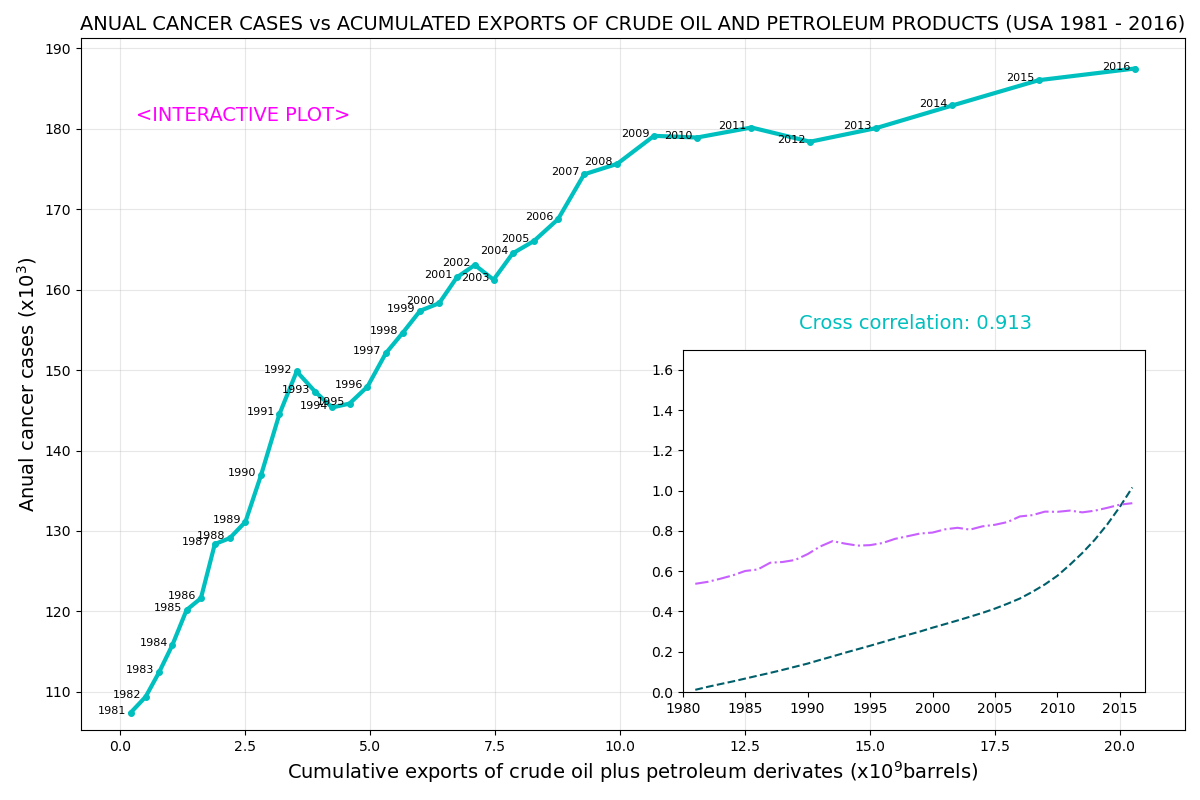

In [8]:
#FOURTH WE SAVE THE 4TH ASSIGNMENT
figure_corr([1981,2016])
plt.savefig('figure_edison_assig4.png', dpi=300)

In [43]:
jupyter nbextension enable --py widgetsnbextension

SyntaxError: invalid syntax (2269694994.py, line 1)

In [41]:
jupyter labextension install @jupyter-widgets/jupyterlab-manager

SyntaxError: invalid syntax (2471653659.py, line 1)